# ML Assignment
Choose a public news website of your choice. Create a script to scrape news from
the news websites. Scrape about 100 news articles from the website and tag them
using classification provided by the website.



*   BCC NEWS data has been extracted from website



Submitted by - Vibha Rao (72160596G)




# Importing necessary libraries.

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


def clean_text(text):
    return ' '.join(word for word in text.split() if word.isalpha())


def get_news_articles(url, num_articles_per_category):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = []
    for paragraph in soup.find_all('p'):
        articles.append(clean_text(paragraph.text))
        if len(articles) >= num_articles_per_category:
            break
    return articles


def categorize_text(text):
    # Define your text categorization logic here. For example:
    if 'politics' in text:
        return 'politics'
    elif 'sports' in text:
        return 'sports'
    elif 'business' in text:
        return 'business'
    else:
        return 'unknown'


def get_category_distribution(categories):
    category_distribution = Counter(categories)
    return category_distribution


def main():
    url = "https://www.nytimes.com"
    num_articles_per_category = 100
    num_articles_total = num_articles_per_category * 3 # assuming 3 categories: politics, sports, business

    articles = get_news_articles(url, num_articles_total)
    categories = [categorize_text(article) for article in articles]
    category_distribution = get_category_distribution(categories)


if __name__ == "__main__":
    main()

In [46]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd


def clean_text(text):
    return ' '.join(word for word in text.split() if word.isalpha())


def get_news_articles(url, num_articles_per_category):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = []
    for paragraph in soup.find_all('p'):
        articles.append(clean_text(paragraph.text))
        if len(articles) >= num_articles_per_category:
            break
    return articles


import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import re

def clean_text(text):
    # remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # convert text to lowercase
    text = text.lower()
    return text

def categorize_text(text):
    # create a defaultdict with categories as keys and values as empty lists
    categories = defaultdict(list)
    # categories are defined by keywords in the text
    keywords = [('business', ['business', 'economy', 'finance']),
                ('entertainment', ['entertainment', 'movies', 'music', 'theater']),
                ('politics', ['politics', 'government', 'president']),
                ('sports', ['sports', 'athletes', 'teams']),
                ('technology', ['technology', 'software', 'hardware']),
                ('science', ['science', 'research', 'discovery'])]
    for category, keywords in keywords:
        for keyword in keywords:
            if keyword in text:
                categories[category].append(text)
    return categories

def get_news_articles(url):
    # fetch the content from the url
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = []
    for paragraph in soup.find_all('p'):
        text = clean_text(paragraph.text)
        articles.append(text)
    return articles

def get_category_distribution(categories):
    # count the number of articles in each category
    category_distribution = defaultdict(int)
    for category, articles in categories.items():
        category_distribution[category] = len(articles)
    return category_distribution

# fetch the news articles
url = "https://www.bbc.com"
articles = get_news_articles(url)

# categorize the articles
categories = categorize_text(' '.join(articles))

# get the category distribution
category_distribution = get_category_distribution(categories)

In [47]:
def save_articles_to_csv(articles, file_name):
    df = pd.DataFrame(articles)
    df.to_csv(file_name, index=False, header=False)

for category, articles in categories.items():
    save_articles_to_csv(articles, category + '.csv')

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import sklearn


from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
dataset = pd.read_csv('/content/News_rain.csv')
test_set = pd.read_csv("/content/News_Test.csv")

In [50]:
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [51]:
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [52]:
dataset['categoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,categoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [53]:
category = dataset[["Category","categoryId"]].drop_duplicates().sort_values('categoryId')
category

,Category,categoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [54]:
dataset.groupby('Category').categoryId.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: categoryId, dtype: int64

# Data Visualization for test data

<Axes: xlabel='Category'>

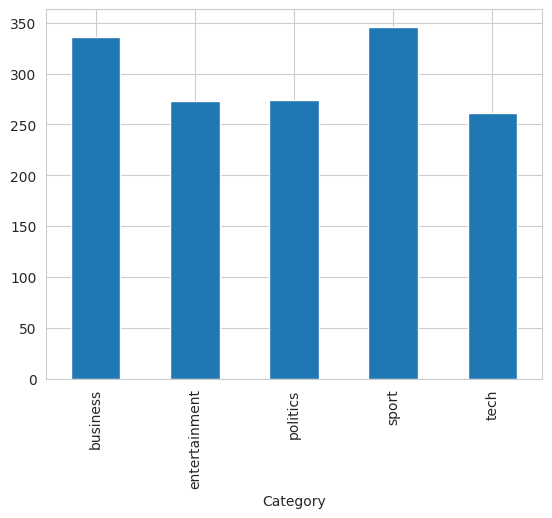

In [55]:
dataset.groupby('Category').categoryId.count().plot.bar(ylim=0)

In [56]:
text = dataset["Text"]
text.head()

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object

In [57]:
category = dataset["Category"]
category.head()

0    business
1    business
2    business
3        tech
4    business
Name: Category, dtype: object

# Data Preprocessing

In [58]:
def preprocessDataset(train_text):

    #word tokenization using text-to-word-sequence
    train_text= str(train_text)
    tokenized_train_set = text_to_word_sequence(train_text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")

    #stop word removal
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]


    #join words into sentence
    stopwordremove_text = ' '.join(stopwordremove)


    #remove numbers
    numberremove_text = ''.join(c for c in stopwordremove_text if not c.isdigit())


    #--Stemming--
    stemmer= PorterStemmer()

    stem_input=nltk.word_tokenize(numberremove_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])


    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])

    return lem_text

# Split train set

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.3, random_state = 60,shuffle=True, stratify=category)

print(len(X_train))
print(len(X_test))

1043
447


# Multinomial Naive Bayes

In [62]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Naive Bayes Train Accuracy Score : 98% 
Naive Bayes Test Accuracy Score  : 96% 

               precision    recall  f1-score   support

     business       0.98      0.94      0.96       105
         tech       0.89      1.00      0.94        73
     politics       0.94      0.92      0.93        84
        sport       1.00      0.98      0.99       106
entertainment       0.95      0.94      0.94        79

     accuracy                           0.96       447
    macro avg       0.95      0.96      0.95       447
 weighted avg       0.96      0.96      0.96       447



# Decision Tree

In [63]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(X_train, Y_train)

test_predict = dt.predict(X_test)

train_accuracy = round(dt.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Decision Tree Train Accuracy Score : 100% 
Decision Tree Test Accuracy Score  : 78% 

               precision    recall  f1-score   support

     business       0.69      0.70      0.70       100
         tech       0.72      0.82      0.77        72
     politics       0.82      0.78      0.80        86
        sport       0.91      0.83      0.87       115
entertainment       0.73      0.77      0.75        74

     accuracy                           0.78       447
    macro avg       0.77      0.78      0.78       447
 weighted avg       0.78      0.78      0.78       447



# Random Forest Classifier

In [64]:
rfc = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100)),
               ])

rfc.fit(X_train, Y_train)

test_predict = rfc.predict(X_test)

train_accuracy = round(rfc.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

K-Nearest Neighbour Train Accuracy Score : 100% 
K-Nearest Neighbour Test Accuracy Score  : 95% 

               precision    recall  f1-score   support

     business       0.98      0.91      0.94       109
         tech       0.93      1.00      0.96        76
     politics       0.90      0.94      0.92        79
        sport       1.00      0.96      0.98       108
entertainment       0.92      0.96      0.94        75

     accuracy                           0.95       447
    macro avg       0.95      0.95      0.95       447
 weighted avg       0.95      0.95      0.95       447



# Test Set

In [65]:
test_set.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


# Train with Naive Bayes

In [71]:
import nltk

# Download the required NLTK resource
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [72]:
test_set['Text'] = test_set['Text'].apply(preprocessDataset)

test_id = test_set['ArticleId']
test_text = test_set['Text']
y_prdict = nb.predict(test_text)

In [73]:
#submission = pd.DataFrame(test_id)
submission = pd.DataFrame(list(zip(test_id, y_prdict)),
               columns =['ArticleId', 'Category'])
submission.head(20)

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
5,51,sport
6,2025,politics
7,1479,sport
8,27,entertainment
9,397,business


In [74]:
submission.to_csv('submission.csv', index=False)